In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
d=pd.read_csv("Cust_Segmentation.csv")
d.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
df=d.drop("Edu",axis=1)
df.head()

,Customer Id,Age,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
x=df[["Age","Years Employed","Income","Card Debt","Other Debt","DebtIncomeRatio"]]
s=StandardScaler()
x=s.fit_transform(x)
x

array([[ 0.74291541, -0.37878978, -0.71845859, -0.68381116, -0.59048916,
        -0.57652509],
       [ 1.48949049,  2.5737211 ,  1.38432469,  1.41447366,  1.51296181,
         0.39138677],
       [-0.25251804,  0.2117124 ,  0.26803233,  2.13414111,  0.80170393,
         1.59755385],
       ...,
       [-1.24795149, -1.26454304, -0.74441888,  0.5766659 ,  0.03863257,
         3.45892281],
       [-0.37694723,  0.50696349, -0.484816  , -0.68757659, -0.70147601,
        -1.08281745],
       [ 2.1116364 ,  1.09746566,  0.44975434,  0.13611081,  0.16463355,
        -0.2340332 ]])

In [5]:
k=KMeans(init="k-means++",n_clusters = 2,n_init=12)
k.fit(x)
labels=k.labels_
centroids=k.cluster_centers_
centroids

array([[-0.24360372, -0.30299398, -0.33068164, -0.3045623 , -0.35048093,
        -0.167624  ],
       [ 0.90674716,  1.12781091,  1.23087055,  1.13364855,  1.3045679 ,
         0.62393379]])

In [6]:
df["Cluster"]=labels
df.head()

,Customer Id,Age,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
0,1,41,6,19,0.124,1.073,0.0,NBA001,6.3,0
1,2,47,26,100,4.582,8.218,0.0,NBA021,12.8,1
2,3,33,10,57,6.111,5.802,1.0,NBA013,20.9,1
3,4,29,4,19,0.681,0.516,0.0,NBA009,6.3,0
4,5,47,31,253,9.308,8.908,0.0,NBA008,7.2,1


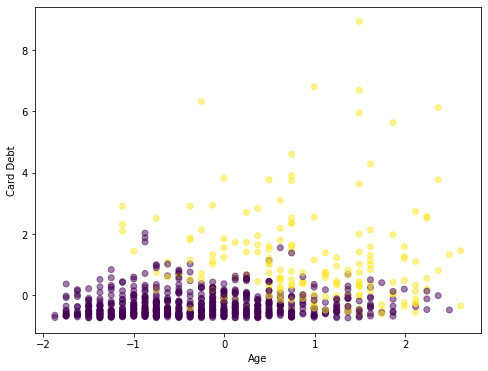

In [7]:
figure=plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,3],c=labels,alpha=0.5)
#plt.scatter(centroids[:,2],centroids[:,3],c=[0,1])
plt.xlabel("Age")
plt.ylabel("Card Debt")
plt.show()

In [11]:
ag=AgglomerativeClustering(n_clusters=2,linkage="average")
ag.fit(x)
labels_ag=ag.labels_
labels_ag

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

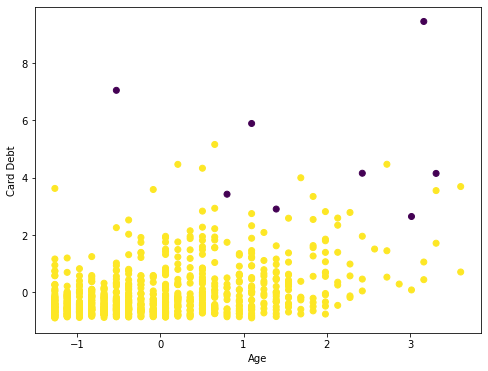

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,1],x[:,4],c=labels_ag)
plt.xlabel("Age")
plt.ylabel("Card Debt")
plt.show()

# DBSCAN

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

In [7]:
d=pd.read_csv("Cust_Segmentation.csv")
d.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [8]:
d.drop(['Customer Id','Address'],axis='columns',inplace=True)
d.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [10]:
s=MinMaxScaler()
df=s.fit_transform(d)
df

array([[0.58333333, 0.25      , 0.18181818, ..., 0.02921681, 0.        ,
        0.15048544],
       [0.75      , 0.        , 0.78787879, ..., 0.23248272, 0.        ,
        0.30825243],
       [0.36111111, 0.25      , 0.3030303 , ..., 0.16375068, 1.        ,
        0.50485437],
       ...,
       [0.13888889, 0.75      , 0.        , ..., 0.09001166, 1.        ,
        0.80825243],
       [0.33333333, 0.        , 0.36363636, ..., 0.01849165, 0.        ,
        0.06796117],
       [0.88888889, 0.        , 0.48484848, ..., 0.1021877 , 0.        ,
        0.20631068]])

In [16]:
db=DBSCAN(eps=0.2,min_samples=10)
df=np.nan_to_num(df)
#x=d[['Age','Flight Distance','Checkin service']]
db.fit(df)
#d=np.nan_to_num(d)
#db.fit(d)
labels=db.labels_
set(labels)

{-1, 0, 1, 2, 3, 4}

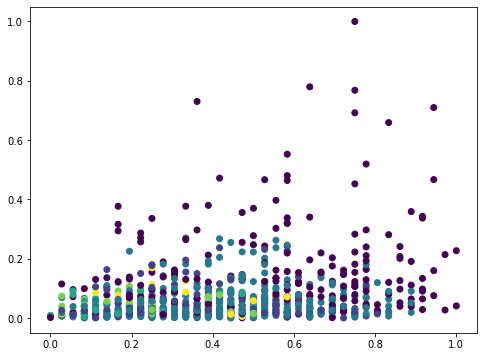

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df[:,0],df[:,4],c=labels)
plt.show()